# Семинар по трехмерной геометрии и градиентному спуску

## Трехмерная геометрия

### Теоретическая часть

#### Ответьте на вопросы:
*  Каким уравнением задается прямая на плоскости? Отличие y = kx + b и ax + by + c = 0
* Записать уравнение плоскости в трехмерном пространстве, гиперплоскости в многомерном пространстве. 
* В пространстве какой размерности задается гиперплоскость из предыдущего вопроса?
* Если какой-то из коэффициентов равен 0, что это геометрически означает?
* Что означает, что свободный член равен 0?

__Решение.__
* В школьных курсах прямая на плоскости задается уравнением $y=kx + b$. Здесь $k$ отвечает за наклон прямой, а $b$ - за смещение по оси ординат. В университетских курсах прямую обычно задают уравнением $ax + by + c = 0$. Это более общий случай: в таком виде можно в том числе задать прямую, параллельную оси ординат, установив $b=0$. В этом отличие от уравнения $y=kx + b$: здесь коэффициент при $y$ равен 1, и прямую, параллельную оси ординат, задать нельзя.
* Уравнения плоскости в трехмерном пространстве задается аналогично: $ax + by +cz + d = 0$. Любую плоскость можно задать таким уравнением, причем не единственным образом. Обобщим уравнение на произвольную размерность: $w_1 x_1 + \dots w_d x_d + w_0 = 0$. 
* Гиперплоскость $w_1 x_1 + \dots w_d x_d + w_0 = 0$ задается в пространстве размерности $d+1$.
* Если коэффициент $w_i=0$, гиперплоскость параллельна $i$-й оси.
* Если свободный член $w_0=0$, гиперплоскость проходит через начало координат $(0, \dots,  0)$.

### Практическая часть: визуализация функции от двух переменных

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [1]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

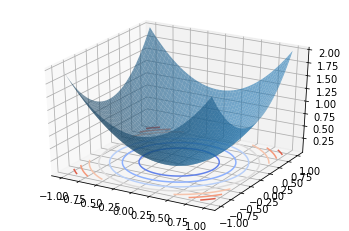

In [3]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

In [ ]:
# student's code here


Нарисуйте плоскость, параллельную любой из горизонтальных осей:

In [ ]:
# student's code here


Нарисуйте плоскость, проходящую через начало координат:

In [ ]:
# student's code here


## Градиентный спуск

### Теоретическая часть

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных в точке $x_0$ - это вектор ее частных производных, вычисленных в точке $x_0$.
$$\nabla_x f \bigl | _{x_0} = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_d} \biggr ) \biggl | _{x_0}$$

Разберем два простых примера вычисления градиента в случае функции от двух переменных.

#### Задача 1.

Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__

Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1 + c_2 x_2)}{\partial x_1} = c_1.$$

Значит, первая компонента градиента равна $c_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (c_1, c_2)$$

Можно подставить конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. Тогда градиент будет равен $(3, 7)$. 

#### Задача 2.
Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

__Решение.__
Найдем первую частную производную: 

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1^2 + c_2 x_2^2)}{\partial x_1} = 2 c_1 x_1.$$

Значит, первая компонента градиента равна $2 c_1 x_1$. Аналогично со второй компонентой. Ответ:

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

__Вспомните из лекции:__
* Какую (оптимизационную) задачу решает градиентный спуск?
* Как работает алгоритм градиентного спуска?
* Как выбирать начальную инициализацию в градиентном спуске?
* Когда останавливать градиентный спуск?

### Практическая часть

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай произвольных коэффициентов:

In [4]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Эта функция способна обрабатывать x1 и x2 любой размерности, но градиенты будем считать в предположении, что x1 и x2 - числа (так проще)

Теперь надо реализовать градиент функции fun. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [ ]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### student's code here
    

Проверьте правильность (сверьте с формулой):

In [ ]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

Теперь реализуем градиентный спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla_x f$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [ ]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    x = np.random.rand(2) * 4 - 2
    ### student's code here
    

Протестируем функцию (последний элемент должен быть близок к 0):

In [ ]:
trace = grad_descend(grad_fun)
trace

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

In [ ]:
### student's code here


Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:

In [ ]:
### student's code here


Попробуйте разную длину шага из множества (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

In [ ]:
### student's code here


При маленькой длине шага процесс идет слишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

In [ ]:
### student's code here


"Вытянутую" функцию сложнее оптимизировать. Именно поэтому рекомендуется нормировать данные перед обучением модели, чтобы избежать таких колебаний при оптимизации.